In [107]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [108]:
df=pd.read_csv("diabetes.csv")

In [109]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
#logitic regresyon
#model



In [111]:
df["Outcome"].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [113]:
y=df["Outcome"]
x=df.drop(["Outcome"],axis=1)

In [114]:
y.head()#baımlı 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [115]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [116]:
log_model=LogisticRegression(solver="liblinear").fit(x,y)

In [117]:
log_model.intercept_

array([-5.84073324])

In [118]:
log_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

In [119]:
log_model.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [120]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [121]:
y_pred=log_model.predict(x)

In [122]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [123]:
accuracy_score(y_pred,y)

0.7747395833333334

In [124]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [125]:
log_model.predict_proba(x)[0:10]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

TypeError: float() argument must be a string or a real number, not 'list'

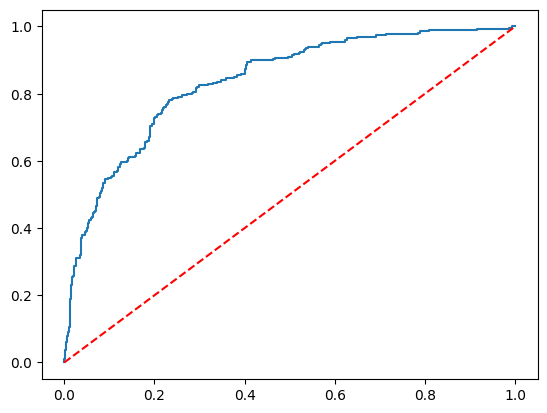

In [126]:
logit_roc_auc=roc_auc_score(y,log_model.predict(x))
fgr,tpr,thresholds=roc_curve(y,log_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fgr,tpr,label='AUC (area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0],[1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false pos rate")
plt.ylabel("true pos rate")
plt.title("receiver operating char")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()                             

model turing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [ ]:
log_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [ ]:

y_pred = log_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [ ]:

cross_val_score(log_model,X_test,y_test,cv=10).mean()

0.7748188405797102

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
knn_model


In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [ ]:

knn_cv_model.best_params_

In [ ]:

knn_cv_model.best_score_

In [ ]:

# Final Model
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)

In [ ]:

y_pred = knn_tuned.predict(X_test)

In [ ]:

print(accuracy_score(y_test,y_pred))

In [ ]:

knn_tuned.score(X_test,y_test)